In [1]:
%cd ar-cnn

/home/ec2-user/SageMaker/aws-deepcomposer-samples/ar-cnn


In [2]:
import s3fs
fs = s3fs.S3FileSystem()

# To List 5 files in your accessible bucket
fs.download('s3://deepcomposer-april-2021-bucket/Que-Sera-Sera-1.mid', 'sample_inputs/que-sera-sera.midi')
fs.download('s3://deepcomposer-april-2021-bucket/Pokemon_DPPt.mid', 'sample_inputs/Pokemon_DPPt.midi')
fs.download('s3://deepcomposer-april-2021-bucket/-best-model-epoch_0186.hdf5', 'checkpoints/-best-model-epoch_0186.hdf5')

In [3]:
!pip install -r requirements.txt

In [4]:
import os
import glob
import json
import numpy as np
import keras
from enum import Enum
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Dropout
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from random import randrange
import random
import math
import pypianoroll
from utils.midi_utils import play_midi, plot_pianoroll, get_music_metrics, process_pianoroll, process_midi
from constants import Constants
from augmentation import AddAndRemoveAPercentageOfNotes
from data_generator import PianoRollGenerator
from utils.generate_training_plots import GenerateTrainingPlots
from inference import Inference
from model import OptimizerType
from model import ArCnnModel

Using TensorFlow backend.


In [5]:
with open('inference_parameters.json') as json_file:
    inference_params = json.load(json_file)

In [6]:
checkpoints = !ls -t checkpoints | head -n1
print(checkpoints)

['-best-model-epoch_0186.hdf5']


In [7]:
inference_obj = Inference()
checkpoint_var = 'checkpoints/'+checkpoints[0]
inference_obj.load_model(checkpoint_var)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [8]:
input_melody = 'sample_inputs/Pokemon_DPPt.midi'  
inference_obj.generate_composition(input_melody, inference_params)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)
Input MIDI file has more than 1 track.
Input MIDI file is longer than 8 bars.


In [9]:
outputs = !ls -t outputs | head -n1

In [10]:
output_melody = 'outputs/'+outputs[0]
print(output_melody)

outputs/output_1.mid


In [11]:
print("The input midi metrics are:")
get_music_metrics(input_melody, beat_resolution=4)

print("\n")
print("The generated output midi metrics are:")
get_music_metrics(output_melody, beat_resolution=4)

The input midi metrics are:
+----------------------+---------------+-----------------+----------------+
| n_pitch_classes_used | in_scale_rate | polyphonic_rate | n_pitches_used |
+======================+===============+=================+================+
| 4                    | 0.042         | 20              | 54.039         |
+----------------------+---------------+-----------------+----------------+


The generated output midi metrics are:
+----------------------+---------------+-----------------+----------------+
| n_pitch_classes_used | in_scale_rate | polyphonic_rate | n_pitches_used |
+======================+===============+=================+================+
| 5                    | 0.062         | 19              | 68.975         |
+----------------------+---------------+-----------------+----------------+


In [12]:
input_pianoroll = process_midi(input_melody, beat_resolution=4)
output_pianoroll = process_midi(output_melody, beat_resolution=4)

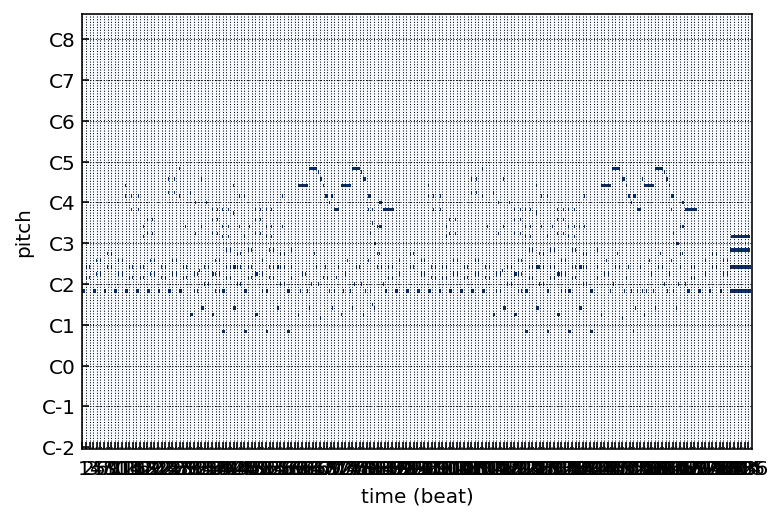

In [13]:
plot_pianoroll(input_pianoroll, beat_resolution=4)

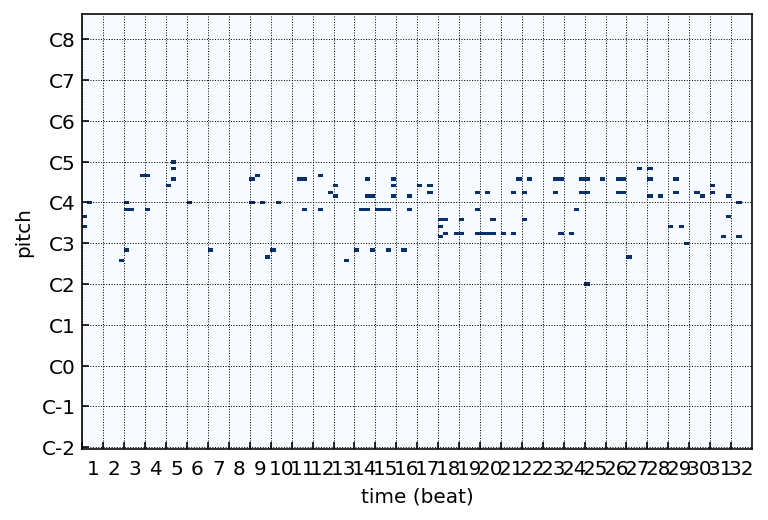

In [14]:
plot_pianoroll(output_pianoroll, beat_resolution=4)